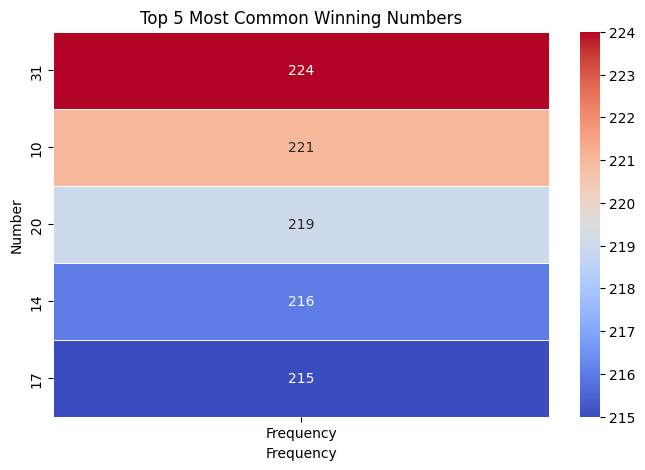

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Flatten the numbers into a single list and convert to integers
all_numbers = pd.concat([winning_numbers[col] for col in winning_numbers.columns]).astype(int)

#freqneucy check
number_counts = all_numbers.value_counts().head(5)

heatmap_data = pd.DataFrame({'Number': number_counts.index, 'Frequency': number_counts.values})

heatmap_data = heatmap_data.set_index('Number')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Top 5 Most Common Winning Numbers')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.show()



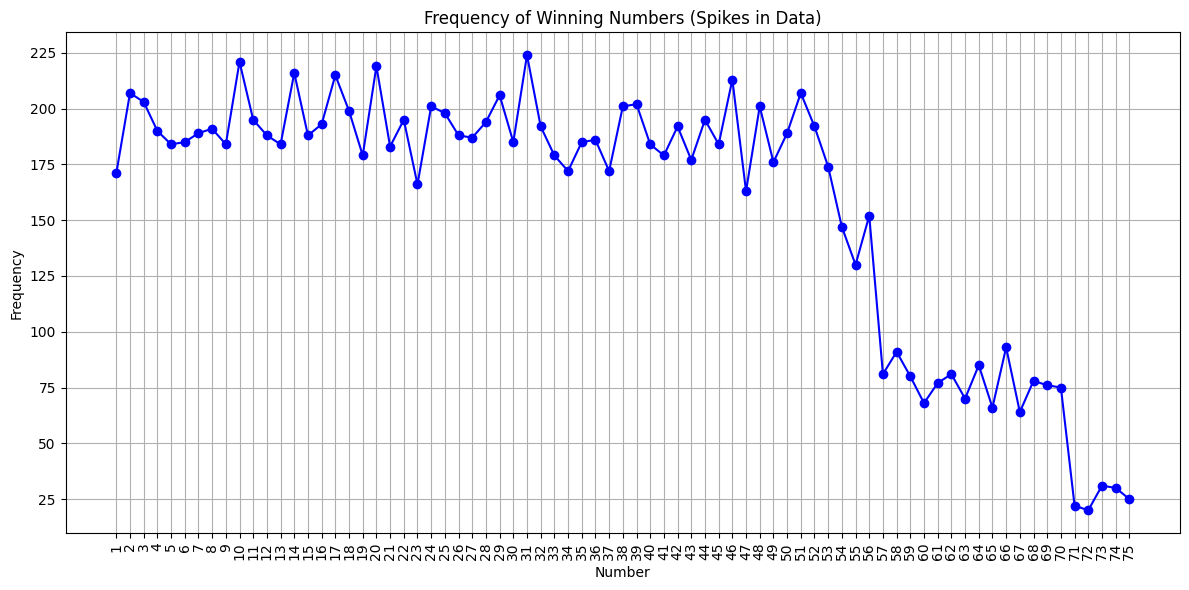

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

all_numbers = pd.concat([winning_numbers[col] for col in winning_numbers.columns]).astype(int)

# frequency check
number_counts = all_numbers.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(number_counts.index, number_counts.values, marker='o', linestyle='-', color='b')
plt.title('Frequency of Winning Numbers (Spikes in Data)')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(number_counts.index, rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Load the dataset
file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

# Split the "Winning Numbers" column into individual numbers
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Flatten the numbers into a single list
all_numbers = pd.concat([winning_numbers[col] for col in winning_numbers.columns]).astype(int)

# Count the frequency of each number
number_counts = all_numbers.value_counts().sort_index()

# Analyze pair frequency
pairs = pd.Series(list(itertools.combinations(all_numbers, 2)))
pair_counts = pairs.value_counts().head(10)

# # Plot frequency distribution of individual numbers
# plt.figure(figsize=(10, 6))
# number_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title('Frequency of Winning Numbers')
# plt.xlabel('Number')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# # Visualize the most common number pairs
# pair_data = pd.DataFrame(pair_counts, columns=['Frequency']).reset_index()
# pair_data.columns = ['Pair', 'Frequency']

# plt.figure(figsize=(8, 5))
# sns.barplot(data=pair_data, x='Frequency', y='Pair', palette='coolwarm')
# plt.title('Top 10 Most Common Winning Number Pairs')
# plt.xlabel('Frequency')
# plt.ylabel('Number Pairs')
# plt.tight_layout()
# plt.show()

# Check if certain numbers are more frequent in specific time periods
data['Draw Date'] = pd.to_datetime(data['Draw Date'])
data['Year'] = data['Draw Date'].dt.year

# Aggregate by year and number
# trend_data = pd.concat([data['Year'].repeat(winning_numbers.shape[1]).reset_index(drop=True),
#                         pd.concat([winning_numbers[col] for col in winning_numbers.columns]).reset_index(drop=True)],
#                        axis=1)
trend_data = winning_numbers
trend_data.columns = ['Year', 'Number']
trend_frequency = trend_data.groupby(['Year', 'Number']).size().unstack(fill_value=0)

# Plot heatmap of numbers by year
plt.figure(figsize=(12, 8))
sns.heatmap(trend_frequency, cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Number')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

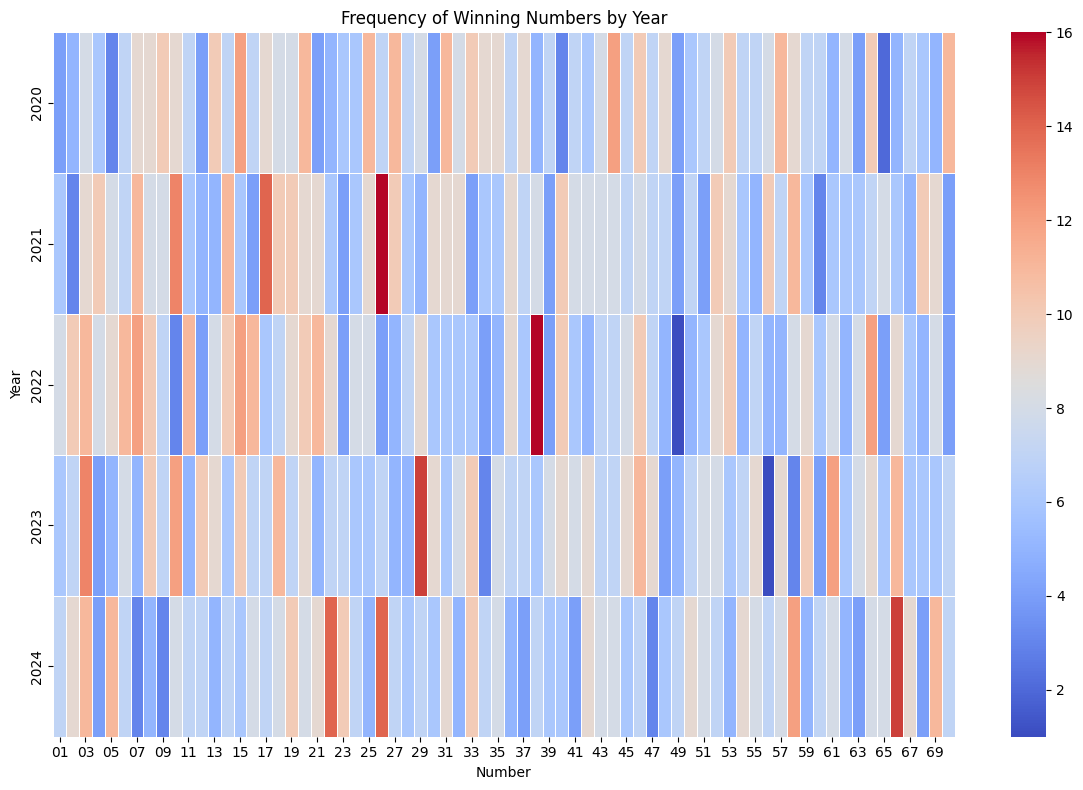

In [ ]:
data[winning_numbers.columns] = winning_numbers
win_numbers_yr = data[['Year', *[f'Number_{i}' for i in range(1,6)]]].set_index('Year').stack().reset_index().rename({0 : 'Number'}, axis='columns').drop('level_1', axis='columns')
trend_frequency = win_numbers_yr.groupby(['Year', 'Number']).size().unstack(fill_value=0)

# Plot heatmap of numbers by year
plt.figure(figsize=(12, 8))
sns.heatmap(trend_frequency, cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Number')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from itertools import combinations

# Load the Excel file
file_path = "sample_data/data1.xlsx"  # Replace with your actual file name
sheet_data = pd.read_excel(file_path)

# Step 1: Calculate total frequency of each number across all rows
number_frequencies = sheet_data.iloc[:, 1:].sum()
total_frequency = number_frequencies.sum()

# Step 2: Generate all combinations of 5 numbers (1 to 70)
numbers = list(range(1, 71))  # Numbers 1 to 70
combinations_of_5 = list(combinations(numbers, 5))

# Step 3: Calculate probabilities for each combination
def calculate_combination_probability(combination):
    probability = 1
    for number in combination:
        probability *= number_frequencies[number] / total_frequency
    return probability

# Step 4: Create a list of combinations and their probabilities
combination_probabilities = [
    {"Combination": combination, "Probability": calculate_combination_probability(combination)}
    for combination in combinations_of_5
]

# Step 5: Save the results to an output Excel file
output_file_path = "lottery_combinations_probabilities.xlsx"  # Output file name
output_data = pd.DataFrame(combination_probabilities)
output_data.to_excel(output_file_path, index=False)

print(f"Output saved to {output_file_path}")


ValueError: This sheet is too large! Your sheet size is: 12103014, 2 Max sheet size is: 1048576, 16384

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# Load the Excel file
file_path = 'sample_data/data1.xlsx'  # Change this to your actual file path
data = pd.read_excel(file_path, header=None)

# Assuming the first row contains column labels
data.columns = ['Year'] + [f'Number_{i}' for i in range(1, 6)]

# Extract the winning numbers by year
winning_numbers = data.iloc[:, 1:6]

# Generate pairwise combinations for each row
pairwise_counts = Counter()

for row in winning_numbers.itertuples(index=False):
    row_numbers = [num for num in row if pd.notna(num)]  # Handle any NaNs
    pairs = combinations(row_numbers, 2)  # Generate all pairs of numbers in this row
    pairwise_counts.update(pairs)

# Convert the pairwise counts into a DataFrame for analysis
pairwise_df = pd.DataFrame(pairwise_counts.items(), columns=['Pair', 'Frequency'])
pairwise_df['Number_1'] = pairwise_df['Pair'].apply(lambda x: x[0])
pairwise_df['Number_2'] = pairwise_df['Pair'].apply(lambda x: x[1])
pairwise_df = pairwise_df.drop('Pair', axis=1)

# Pivot the table for a heatmap
heatmap_data = pairwise_df.pivot(index='Number_1', columns='Number_2', values='Frequency').fillna(0)

# Plot the heatmap of pairwise frequencies
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Frequency of Winning Numbers')
plt.xlabel('Number 2')
plt.ylabel('Number 1')
plt.tight_layout()
plt.show()

# Display the top 10 most common pairs
top_pairs = pairwise_df.sort_values(by='Frequency', ascending=False).head(10)
print("Top 10 Most Common Pairs of Winning Numbers:")
print(top_pairs)


ValueError: Length mismatch: Expected axis has 71 elements, new values have 6 elements

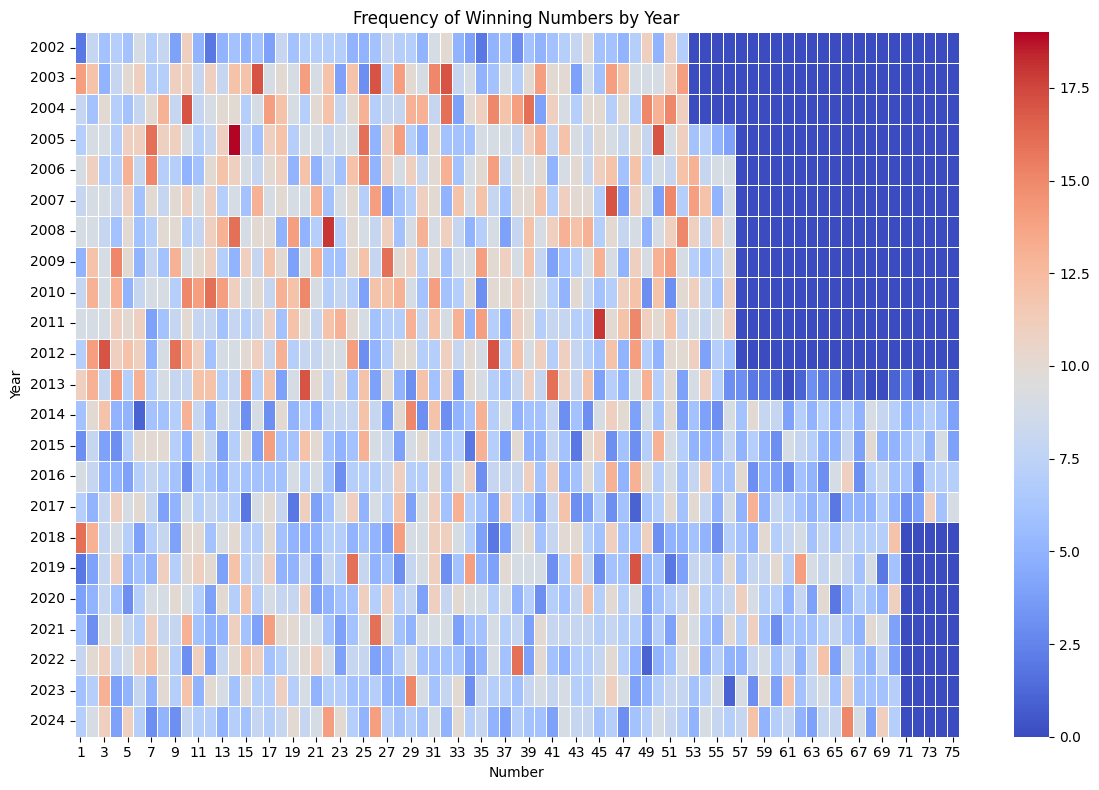

Most common winning numbers:
Number
31    224
10    221
20    219
14    216
17    215
dtype: int64
Yearly trends in most frequent numbers:
Year 2002: Most frequent number was 10
Year 2003: Most frequent number was 16
Year 2004: Most frequent number was 10
Year 2005: Most frequent number was 14
Year 2006: Most frequent number was 7
Year 2007: Most frequent number was 46
Year 2008: Most frequent number was 22
Year 2009: Most frequent number was 27
Year 2010: Most frequent number was 12
Year 2011: Most frequent number was 45
Year 2012: Most frequent number was 3
Year 2013: Most frequent number was 20
Year 2014: Most frequent number was 29
Year 2015: Most frequent number was 17
Year 2016: Most frequent number was 46
Year 2017: Most frequent number was 33
Year 2018: Most frequent number was 1
Year 2019: Most frequent number was 48
Year 2020: Most frequent number was 15
Year 2021: Most frequent number was 26
Year 2022: Most frequent number was 38
Year 2023: Most frequent number was 29
Year 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

# Ensure correct types and trim whitespace
data['Winning Numbers'] = data['Winning Numbers'].str.strip()
data['Draw Date'] = pd.to_datetime(data['Draw Date'], errors='coerce')
data['Year'] = data['Draw Date'].dt.year

# Split the "Winning Numbers" column into individual numbers
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Ensure numeric conversion and handle errors
for col in winning_numbers.columns:
    winning_numbers[col] = pd.to_numeric(winning_numbers[col], errors='coerce')

# Drop rows with invalid data
data = data.dropna(subset=['Draw Date'])
winning_numbers = winning_numbers.dropna()

# Add winning numbers back to the dataset
data = data.reset_index(drop=True)
data[winning_numbers.columns] = winning_numbers.reset_index(drop=True)

# Create a dataframe of winning numbers by year
winning_columns = [f'Number_{i+1}' for i in range(5)]
win_numbers_yr = data.melt(id_vars=['Year'], value_vars=winning_columns, var_name='Number_Position', value_name='Number').drop('Number_Position', axis=1)

# Group by year and number to get frequency trend
trend_frequency = win_numbers_yr.groupby(['Year', 'Number']).size().unstack(fill_value=0)

# Plot heatmap of numbers by year
plt.figure(figsize=(12, 8))
sns.heatmap(trend_frequency, cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Winning Numbers by Year')
plt.xlabel('Number')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# Statistical trends analysis
number_frequency = trend_frequency.sum(axis=0).sort_values(ascending=False)
print("Most common winning numbers:")
print(number_frequency.head())

print("Yearly trends in most frequent numbers:")
for year in trend_frequency.index:
    most_frequent = trend_frequency.loc[year].idxmax()
    print(f"Year {year}: Most frequent number was {most_frequent}")



In [ ]:
# Yearly trends with counts of the most frequent numbers
print("Yearly trends in most frequent numbers with counts:")
for year in trend_frequency.index:
    most_frequent = trend_frequency.loc[year].idxmax()
    count = trend_frequency.loc[year, most_frequent]
    print(f"Year {year}: Most frequent number was {most_frequent} (called {count} times)")


Yearly trends in most frequent numbers with counts:
Year 2002: Most frequent number was 10 (called 11 times)
Year 2003: Most frequent number was 16 (called 17 times)
Year 2004: Most frequent number was 10 (called 17 times)
Year 2005: Most frequent number was 14 (called 19 times)
Year 2006: Most frequent number was 7 (called 15 times)
Year 2007: Most frequent number was 46 (called 17 times)
Year 2008: Most frequent number was 22 (called 18 times)
Year 2009: Most frequent number was 27 (called 16 times)
Year 2010: Most frequent number was 12 (called 16 times)
Year 2011: Most frequent number was 45 (called 18 times)
Year 2012: Most frequent number was 3 (called 17 times)
Year 2013: Most frequent number was 20 (called 17 times)
Year 2014: Most frequent number was 29 (called 15 times)
Year 2015: Most frequent number was 17 (called 14 times)
Year 2016: Most frequent number was 46 (called 13 times)
Year 2017: Most frequent number was 33 (called 13 times)
Year 2018: Most frequent number was 1 

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

# Ensure correct types and trim whitespace
data['Winning Numbers'] = data['Winning Numbers'].str.strip()
data['Draw Date'] = pd.to_datetime(data['Draw Date'], errors='coerce')
data['Year'] = data['Draw Date'].dt.year

# Split the "Winning Numbers" column into individual numbers
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Ensure numeric conversion and handle errors
for col in winning_numbers.columns:
    winning_numbers[col] = pd.to_numeric(winning_numbers[col], errors='coerce')

# Drop rows with invalid data
data = data.dropna(subset=['Draw Date'])
winning_numbers = winning_numbers.dropna()

# Add winning numbers back to the dataset
data = data.reset_index(drop=True)
data[winning_numbers.columns] = winning_numbers.reset_index(drop=True)

# Create a dataframe of winning numbers by year
winning_columns = [f'Number_{i+1}' for i in range(5)]
win_numbers_yr = data.melt(id_vars=['Year'], value_vars=winning_columns, var_name='Number_Position', value_name='Number').drop('Number_Position', axis=1)

# Group by year and number to get frequency trend
trend_frequency = win_numbers_yr.groupby(['Year', 'Number']).size().unstack(fill_value=0)

# Save frequency data to an Excel sheet
output_file = 'lottery_number_frequency.xlsx'
with pd.ExcelWriter(output_file) as writer:
    trend_frequency.to_excel(writer, sheet_name='Frequency_by_Year')

# Print summary of most common numbers
number_frequency = trend_frequency.sum(axis=0).sort_values(ascending=False)
print("Most common winning numbers:")
print(number_frequency.head())

print("Yearly trends in most frequent numbers:")
for year in trend_frequency.index:
    most_frequent = trend_frequency.loc[year].idxmax()
    print(f"Year {year}: Most frequent number was {most_frequent}")



Most common winning numbers:
Number
31    224
10    221
20    219
14    216
17    215
dtype: int64
Yearly trends in most frequent numbers:
Year 2002: Most frequent number was 10
Year 2003: Most frequent number was 16
Year 2004: Most frequent number was 10
Year 2005: Most frequent number was 14
Year 2006: Most frequent number was 7
Year 2007: Most frequent number was 46
Year 2008: Most frequent number was 22
Year 2009: Most frequent number was 27
Year 2010: Most frequent number was 12
Year 2011: Most frequent number was 45
Year 2012: Most frequent number was 3
Year 2013: Most frequent number was 20
Year 2014: Most frequent number was 29
Year 2015: Most frequent number was 17
Year 2016: Most frequent number was 46
Year 2017: Most frequent number was 33
Year 2018: Most frequent number was 1
Year 2019: Most frequent number was 48
Year 2020: Most frequent number was 15
Year 2021: Most frequent number was 26
Year 2022: Most frequent number was 38
Year 2023: Most frequent number was 29
Year 2

<ipython-input-79-219e76451c77>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_frequent_numbers.index, y=top_frequent_numbers.values, palette='viridis')


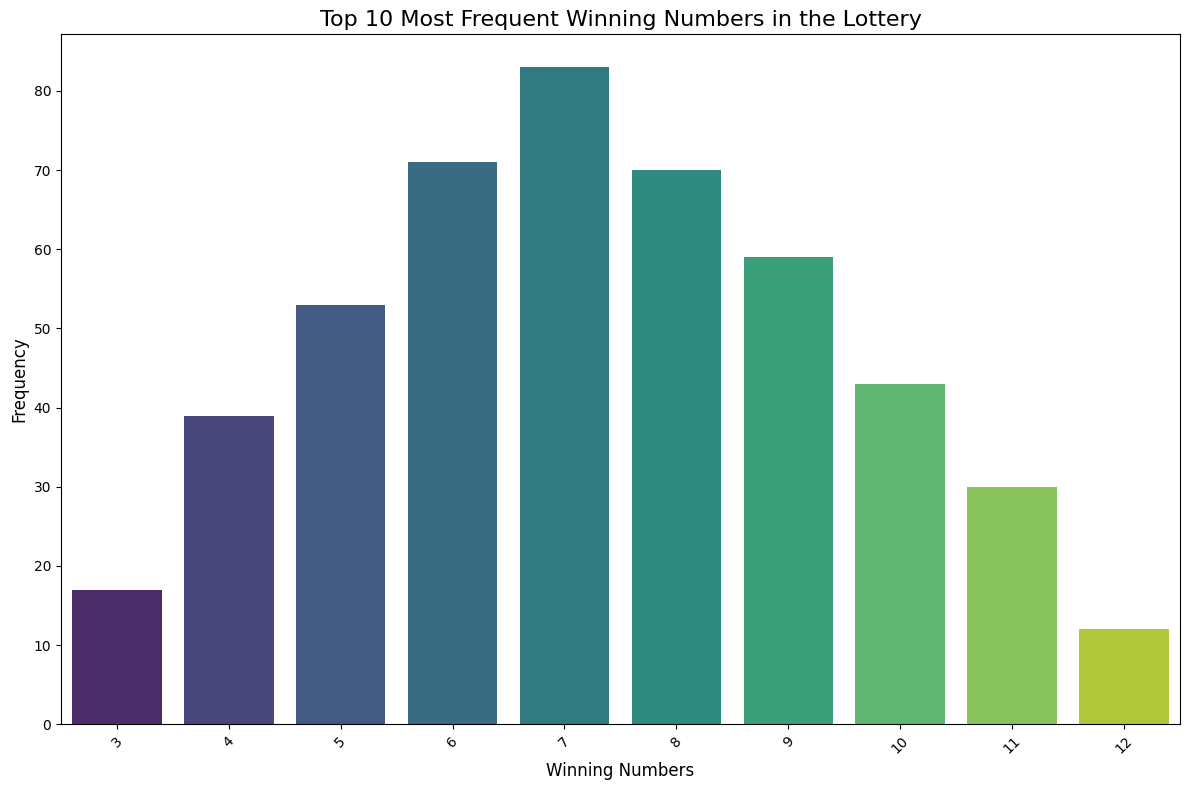

Full Frequency Distribution:
1      3
2      6
3     17
4     39
5     53
      ..
66     1
67     1
68     1
69     1
70     1
Name: count, Length: 70, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'sample_data/data1.xlsx'  # Change this to your actual file path
data = pd.read_excel(file_path, header=None)

# Assuming the first column contains year labels
data.columns = ['Year'] + list(range(1, len(data.columns)))

# Transpose the data to align years as rows
data = data.T
data.columns = data.iloc[0]  # Set the first row as column headers (Years)
data = data[1:]  # Drop the first row (it is now used as column names)

# Flatten the dataset to get a single list of all numbers
numbers = data.values.flatten()

# Convert all numbers to numeric, ignoring errors
numbers = pd.to_numeric(numbers, errors='coerce')

# Count the frequency of each number
frequency = pd.Series(numbers).value_counts().sort_index()

# Select the top 10 most frequent numbers
top_frequent_numbers = frequency.nlargest(10)

# Plot the top 10 most frequent numbers
plt.figure(figsize=(12, 8))
sns.barplot(x=top_frequent_numbers.index, y=top_frequent_numbers.values, palette='viridis')

# Customize the plot
plt.title('Top 10 Most Frequent Winning Numbers in the Lottery', fontsize=16)
plt.xlabel('Winning Numbers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Display full frequency distribution
print("Full Frequency Distribution:")
print(frequency)


<ipython-input-14-61de0941d957>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sets.index.astype(str), x=top_sets.values, palette='viridis')


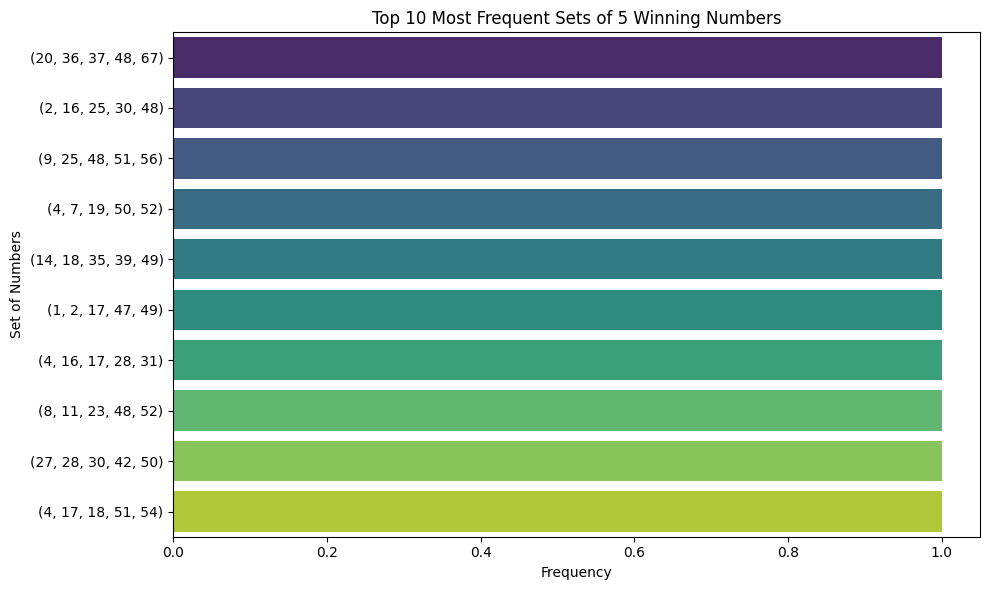

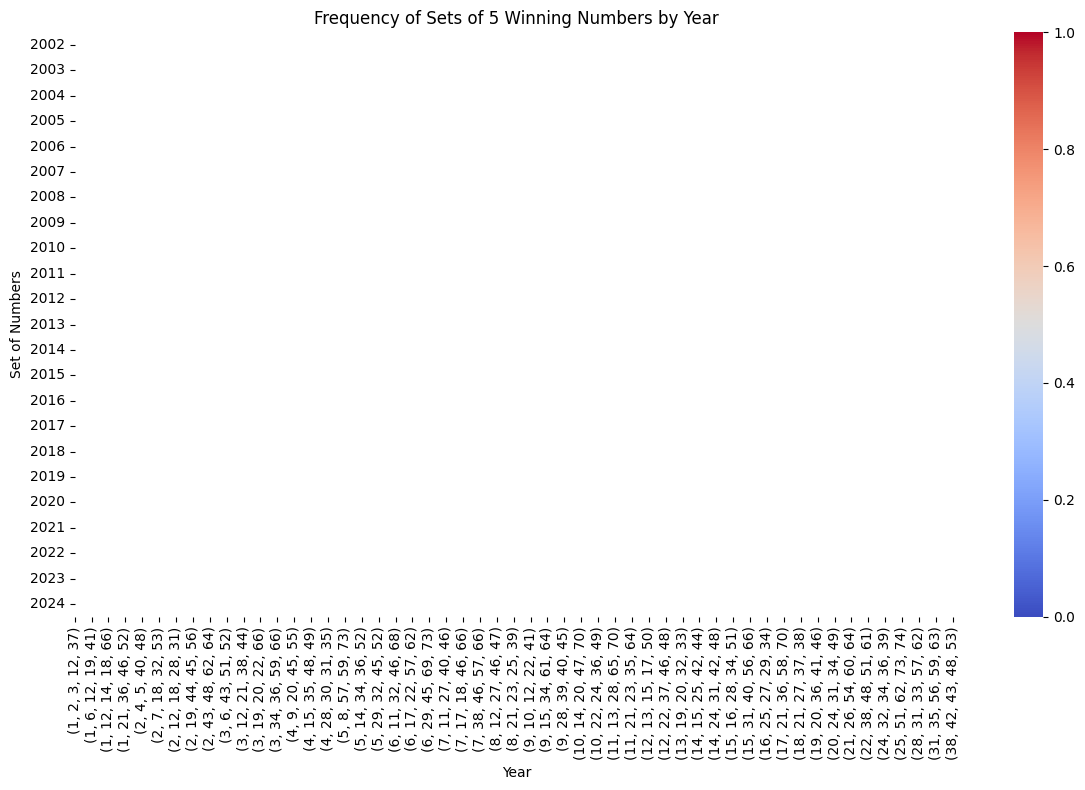

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

# Split the "Winning Numbers" column into individual numbers
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Create sets of 5 numbers (sorted for consistency)
data['Number_Set'] = winning_numbers.apply(lambda row: tuple(sorted(row.astype(int))), axis=1)

# Count the frequency of each unique set of 5 numbers
set_counts = data['Number_Set'].value_counts()

# Plot the top 10 most common sets
top_sets = set_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_sets.index.astype(str), x=top_sets.values, palette='viridis')
plt.title('Top 10 Most Frequent Sets of 5 Winning Numbers')
plt.xlabel('Frequency')
plt.ylabel('Set of Numbers')
plt.tight_layout()
plt.show()

# Plot heatmap of set frequencies by year
data['Draw Date'] = pd.to_datetime(data['Draw Date'])
data['Year'] = data['Draw Date'].dt.year

# Group by year and set
set_by_year = data.groupby(['Year', 'Number_Set']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(set_by_year, cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Sets of 5 Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Set of Numbers')
plt.tight_layout()
plt.show()


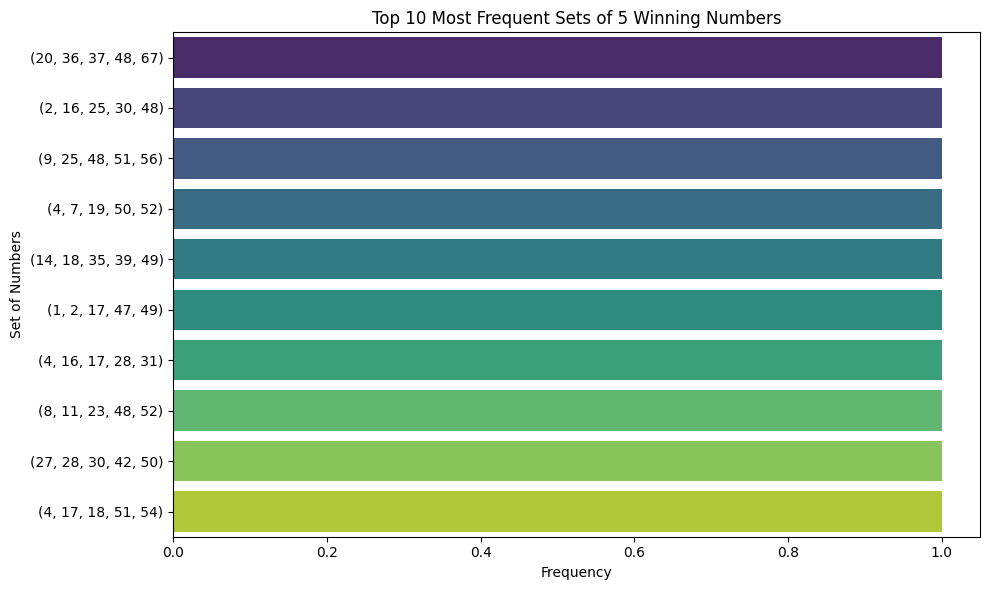

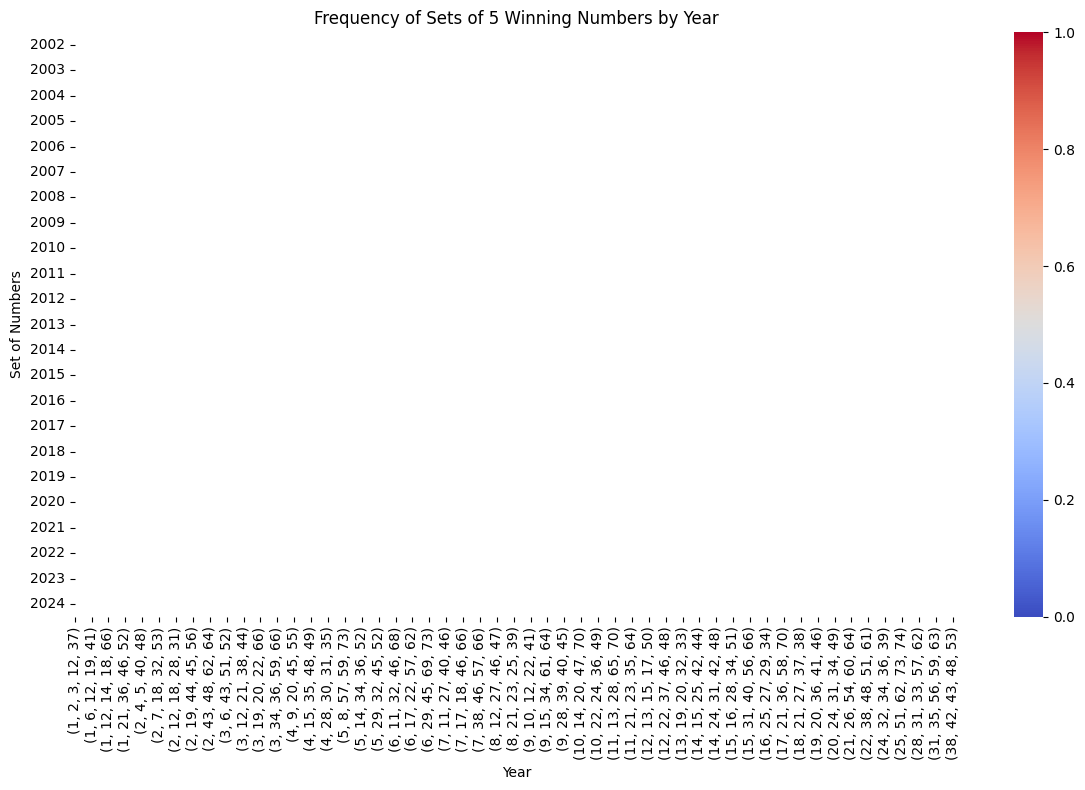

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'sample_data/Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv'
data = pd.read_csv(file_path)

# Ensure correct types and trim whitespace
data['Winning Numbers'] = data['Winning Numbers'].str.strip()
data['Draw Date'] = pd.to_datetime(data['Draw Date'], errors='coerce')

# Split the "Winning Numbers" column into individual numbers
winning_numbers = data['Winning Numbers'].str.split(' ', expand=True)
winning_numbers.columns = [f'Number_{i+1}' for i in range(winning_numbers.shape[1])]

# Ensure numeric conversion and handle errors
for col in winning_numbers.columns:
    winning_numbers[col] = pd.to_numeric(winning_numbers[col], errors='coerce')

# Drop rows with invalid data
data = data.dropna(subset=['Draw Date'])
winning_numbers = winning_numbers.dropna()

# Create sets of 5 numbers (sorted for consistency)
data['Number_Set'] = winning_numbers.apply(lambda row: tuple(sorted(row.astype(int))), axis=1)

# Count the frequency of each unique set of 5 numbers
set_counts = data['Number_Set'].value_counts()

# Plot the top 10 most common sets
top_sets = set_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_sets.index.astype(str), x=top_sets.values, palette='viridis', hue=top_sets.index.astype(str), dodge=False, legend=False)
plt.title('Top 10 Most Frequent Sets of 5 Winning Numbers')
plt.xlabel('Frequency')
plt.ylabel('Set of Numbers')
plt.tight_layout()
plt.show()

# Plot heatmap of set frequencies by year
data['Year'] = data['Draw Date'].dt.year

# Group by year and set
set_by_year = data.groupby(['Year', 'Number_Set']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(set_by_year, cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Sets of 5 Winning Numbers by Year')
plt.xlabel('Year')
plt.ylabel('Set of Numbers')
plt.tight_layout()
plt.show()
